In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time

In [129]:
df = pd.read_csv("ticker_close_data.csv")
df = df.drop(columns="HUUUGE, INC.")

In [130]:
df["date"] = pd.to_datetime(df["date"], format = '%d-%m-%Y')


In [131]:

table = df.replace(0, np.nan)
table = table.set_index("date")

In [132]:
table.head()

,11 BIT STUDIOS SPOLKA AKCYJNA,X-TRADE BROKERS DOM MAKLERSKI SPOLKA AKCYJNA,WIRTUALNA POLSKA HOLDING SPOLKA AKCYJNA,TEN SQUARE GAMES SPOLKA AKCYJNA,SELVITA SPOLKA AKCYJNA,PLAYWAY SPOLKA AKCYJNA,PKP CARGO SPOLKA AKCYJNA,POLENERGIA SPOLKA AKCYJNA,ONCOARENDI THERAPEUTICS SPOLKA AKCYJNA,NEUCA SPOLKA AKCYJNA,...,CELON PHARMA SPOLKA AKCYJNA,COMARCH SPOLKA AKCYJNA,DATAWALK SPOLKA AKCYJNA,DOM DEVELOPMENT SPOLKA AKCYJNA,AMREST HOLDINGS SE,ENEA SPOLKA AKCYJNA,GRUPA AZOTY SPOLKA AKCYJNA,ASBISC ENTERPRISES PLC,ASSECO SOUTH EASTERN EUROPE SPOLKA AKCYJNA,BUDIMEX SPOLKA AKCYJNA
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,73.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,72.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-11,72.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

In [134]:
returns_daily.head()

,11 BIT STUDIOS SPOLKA AKCYJNA,X-TRADE BROKERS DOM MAKLERSKI SPOLKA AKCYJNA,WIRTUALNA POLSKA HOLDING SPOLKA AKCYJNA,TEN SQUARE GAMES SPOLKA AKCYJNA,SELVITA SPOLKA AKCYJNA,PLAYWAY SPOLKA AKCYJNA,PKP CARGO SPOLKA AKCYJNA,POLENERGIA SPOLKA AKCYJNA,ONCOARENDI THERAPEUTICS SPOLKA AKCYJNA,NEUCA SPOLKA AKCYJNA,...,CELON PHARMA SPOLKA AKCYJNA,COMARCH SPOLKA AKCYJNA,DATAWALK SPOLKA AKCYJNA,DOM DEVELOPMENT SPOLKA AKCYJNA,AMREST HOLDINGS SE,ENEA SPOLKA AKCYJNA,GRUPA AZOTY SPOLKA AKCYJNA,ASBISC ENTERPRISES PLC,ASSECO SOUTH EASTERN EUROPE SPOLKA AKCYJNA,BUDIMEX SPOLKA AKCYJNA
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.054286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,-0.017615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,-0.006897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-11,0.005556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

In [136]:
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(returns_daily.columns)
num_portfolios = 50000
max_number_of_assets = 10

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    if max_number_of_assets<num_assets and max_number_of_assets!=0:
        ones = np.ones(max_number_of_assets)
        zeros = np.zeros(num_assets-max_number_of_assets)
        mask = np.concatenate([ones, zeros])
        np.random.shuffle(mask)
        weights = np.random.random(num_assets)*mask
    else:
        weights = np.random.random(num_assets)
        
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [137]:
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(returns_daily.columns):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df_portfolio = pd.DataFrame(portfolio)

In [138]:
df_portfolio.head()

,Returns,Volatility,11 BIT STUDIOS SPOLKA AKCYJNA Weight,X-TRADE BROKERS DOM MAKLERSKI SPOLKA AKCYJNA Weight,WIRTUALNA POLSKA HOLDING SPOLKA AKCYJNA Weight,TEN SQUARE GAMES SPOLKA AKCYJNA Weight,SELVITA SPOLKA AKCYJNA Weight,PLAYWAY SPOLKA AKCYJNA Weight,PKP CARGO SPOLKA AKCYJNA Weight,POLENERGIA SPOLKA AKCYJNA Weight,...,CELON PHARMA SPOLKA AKCYJNA Weight,COMARCH SPOLKA AKCYJNA Weight,DATAWALK SPOLKA AKCYJNA Weight,DOM DEVELOPMENT SPOLKA AKCYJNA Weight,AMREST HOLDINGS SE Weight,ENEA SPOLKA AKCYJNA Weight,GRUPA AZOTY SPOLKA AKCYJNA Weight,ASBISC ENTERPRISES PLC Weight,ASSECO SOUTH EASTERN EUROPE SPOLKA AKCYJNA Weight,BUDIMEX SPOLKA AKCYJNA Weight
0,0.342527,0.380708,0.000000,0.000000,0.000000,0.141504,0.000000,0.0,0.002455,0.000000,...,0.065173,0.000000,0.000000,0.000000,0.00000,0.00195,0.000000,0.000000,0.000000,0.0
1,0.222283,0.204544,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.068970,0.087625,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.11713,0.000000,0.000000,0.000000,0.0
2,0.356515,0.252618,0.000000,0.180645,0.000000,0.000000,0.000000,0.0,0.000000,0.097963,...,0.144723,0.000000,0.000000,0.171699,0.08079,0.00000,0.014642,0.000000,0.035055,0.0
3,0.184899,0.222447,0.000000,0.000000,0.015128,0.000000,0.068869,0.0,0.000000,0.000000,...,0.000000,0.143923,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
4,0.581869,0.313187,0.120044,0.192432,0.000000,0.000000,0.176206,0.0,0.000000,0.102446,...,0.000000,0.000000,0.175847,0.000000,0.00000,0.00000,0.000000,0.027968,0.000000,0.0


In [139]:
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in returns_daily.columns]
df_portfolio = df_portfolio[column_order]

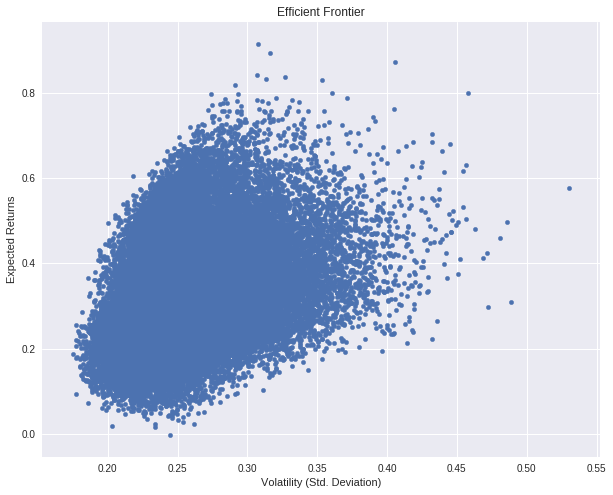

In [140]:
plt.style.use('seaborn')
df_portfolio.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

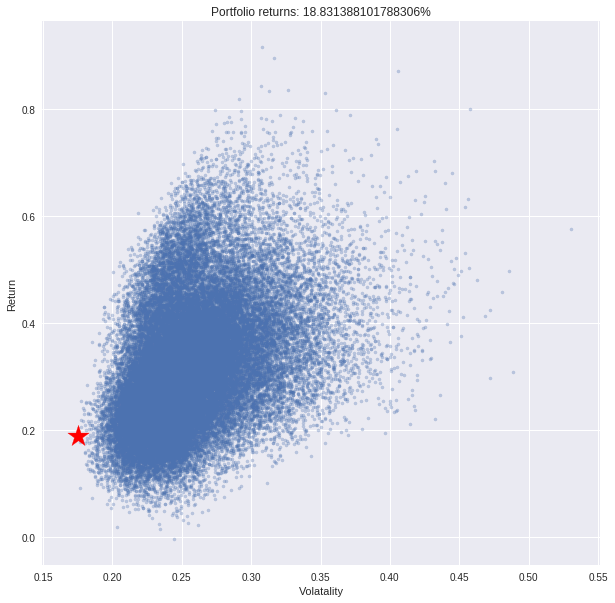

In [141]:
min_vol_port = df_portfolio.iloc[df_portfolio['Volatility'].idxmin()]
plt.subplots(figsize=[10,10])
plt.scatter(df_portfolio['Volatility'], df_portfolio['Returns'],marker='o', s=10, alpha=0.3)
plt.xlabel("Volatality")
plt.ylabel("Return")
plt.title(f"Portfolio returns: {min_vol_port[0]*100}%")
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [142]:
min_voltality_portfolio = min_vol_port.loc[(min_vol_port!=0)]
min_voltality_portfolio

Returns                                            0.188314
Volatility                                         0.175268
PLAYWAY SPOLKA AKCYJNA Weight                      0.020192
POLENERGIA SPOLKA AKCYJNA Weight                   0.101298
NEUCA SPOLKA AKCYJNA Weight                        0.248251
LIVECHAT SOFTWARE SPOLKA AKCYJNA Weight            0.036704
ING BANK ŚLĄSKI SPOLKA AKCYJNA Weight              0.035113
EUROCASH SPOLKA AKCYJNA Weight                     0.066943
BANK HANDLOWY W WARSZAWIE SPOLKA AKCYJNA Weight    0.161676
INTER CARS SPOLKA AKCYJNA Weight                   0.072247
COMARCH SPOLKA AKCYJNA Weight                      0.121998
BUDIMEX SPOLKA AKCYJNA Weight                      0.135579
Name: 17793, dtype: float64

In [143]:
rf = 0.0289 # risk factor
optimal_risky_port = df_portfolio.iloc[((df_portfolio['Returns']-rf)/df_portfolio['Volatility']).idxmax()]
optimal_risky_port

Returns                                                                                   0.914017
Volatility                                                                                0.307801
11 BIT STUDIOS SPOLKA AKCYJNA Weight                                                      0.000000
X-TRADE BROKERS DOM MAKLERSKI SPOLKA AKCYJNA Weight                                       0.000000
WIRTUALNA POLSKA HOLDING SPOLKA AKCYJNA Weight                                            0.079557
TEN SQUARE GAMES SPOLKA AKCYJNA Weight                                                    0.000000
SELVITA SPOLKA AKCYJNA Weight                                                             0.020505
PLAYWAY SPOLKA AKCYJNA Weight                                                             0.125653
PKP CARGO SPOLKA AKCYJNA Weight                                                           0.000000
POLENERGIA SPOLKA AKCYJNA Weight                                                          0.000000
ONCOARENDI

Text(0.5, 1.0, 'Portfolio returns: 91.40168028200549%')

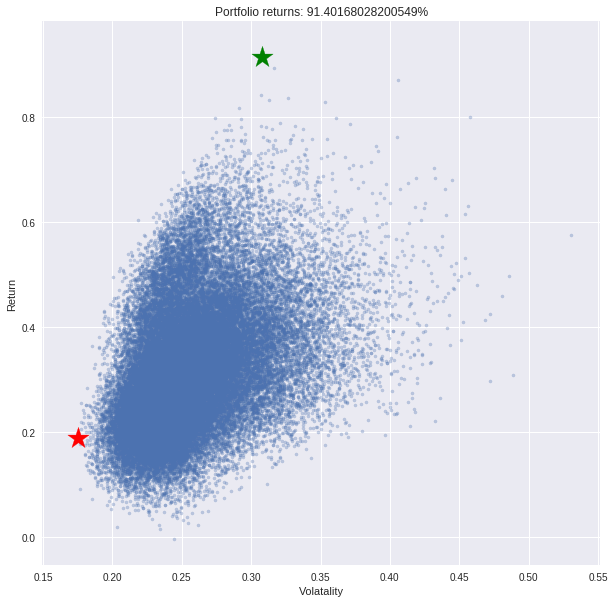

In [144]:
plt.subplots(figsize=(10, 10))
plt.scatter(df_portfolio['Volatility'], df_portfolio['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.xlabel("Volatality")
plt.ylabel("Return")
plt.title(f"Portfolio returns: {optimal_risky_port[0]*100}%")


In [145]:
optimal_risky = optimal_risky_port.loc[(optimal_risky_port!=0)]
optimal_risky

Returns                                                                                   0.914017
Volatility                                                                                0.307801
WIRTUALNA POLSKA HOLDING SPOLKA AKCYJNA Weight                                            0.079557
SELVITA SPOLKA AKCYJNA Weight                                                             0.020505
PLAYWAY SPOLKA AKCYJNA Weight                                                             0.125653
KRUK SPOLKA AKCYJNA Weight                                                                0.020246
FAMUR SPOLKA AKCYJNA Weight                                                               0.052592
BIOMED-LUBLIN WYTWORNIA SUROWIC I SZCZEPIONEK SPOLKA AKCYJNA W RESTRUKTURYZACJI Weight    0.146502
BANK HANDLOWY W WARSZAWIE SPOLKA AKCYJNA Weight                                           0.107907
INTER CARS SPOLKA AKCYJNA Weight                                                          0.080660
ASBISC ENT

In [146]:

returns_daily.mean()

11 BIT STUDIOS SPOLKA AKCYJNA                                                      0.001600
X-TRADE BROKERS DOM MAKLERSKI SPOLKA AKCYJNA                                       0.001766
WIRTUALNA POLSKA HOLDING SPOLKA AKCYJNA                                            0.001352
TEN SQUARE GAMES SPOLKA AKCYJNA                                                    0.002751
SELVITA SPOLKA AKCYJNA                                                             0.002952
PLAYWAY SPOLKA AKCYJNA                                                             0.002340
PKP CARGO SPOLKA AKCYJNA                                                          -0.000377
POLENERGIA SPOLKA AKCYJNA                                                          0.001517
ONCOARENDI THERAPEUTICS SPOLKA AKCYJNA                                             0.002270
NEUCA SPOLKA AKCYJNA                                                               0.000892
BANK MILLENNIUM SPOLKA AKCYJNA                                                  

In [147]:
an_return = returns_daily.mean()* 252
an_return

11 BIT STUDIOS SPOLKA AKCYJNA                                                      0.403074
X-TRADE BROKERS DOM MAKLERSKI SPOLKA AKCYJNA                                       0.444989
WIRTUALNA POLSKA HOLDING SPOLKA AKCYJNA                                            0.340700
TEN SQUARE GAMES SPOLKA AKCYJNA                                                    0.693322
SELVITA SPOLKA AKCYJNA                                                             0.743860
PLAYWAY SPOLKA AKCYJNA                                                             0.589702
PKP CARGO SPOLKA AKCYJNA                                                          -0.094907
POLENERGIA SPOLKA AKCYJNA                                                          0.382342
ONCOARENDI THERAPEUTICS SPOLKA AKCYJNA                                             0.572037
NEUCA SPOLKA AKCYJNA                                                               0.224712
BANK MILLENNIUM SPOLKA AKCYJNA                                                  

In [148]:
weights = np.random.dirichlet(np.ones(len(returns_daily.columns)), size=1)
weights = weights[0]
print(weights)

[0.01153364 0.01442805 0.0172608  0.0391006  0.00168819 0.02834927
 0.07857908 0.12117933 0.00030906 0.03443641 0.07986601 0.02479551
 0.03895217 0.05599549 0.0034471  0.01961433 0.04290839 0.03723515
 0.01431051 0.02383023 0.02176878 0.01313525 0.08576173 0.00089238
 0.01272949 0.02762432 0.0130495  0.01045542 0.00819724 0.00473431
 0.01818615 0.01169303 0.01655214 0.02501305 0.02885819 0.00794366
 0.00558603]


In [149]:
exp_port_return = np.sum(returns_daily.mean()*weights)*252
print(exp_port_return)

0.34710118689906283


In [150]:
def portfolio_simulation(iterations, df):
    '''
    Runs a simulation by randomly selecting portfolio weights a specified
    number of times (iterations), returns the list of results and plots 
    all the portfolios as well.
    
    Parameters:
    -----------  
        assets: list
            all the assets that are to be pulled from Quandl to comprise
            our portfolio.    
        iterations: int 
            the number of randomly generated portfolios to build.
    
    Returns:
    --------
        port_returns: array
            array of all the simulated portfolio returns.
        port_vols: array
            array of all the simulated portfolio volatilities.
    '''
    
    start = time.time()
    num_assets = len(df.columns)
    
    # Fetch data    

    returns = np.log(df / df.shift(1))
    
    port_returns = []
    port_vols = []
    
    for i in range (iterations):
        weights = np.random.dirichlet(np.ones(num_assets),size=1)
        weights = weights[0]
        port_returns.append(np.sum(returns.mean() * weights) * 252)
        port_vols.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights))))
    
    # Convert lists to arrays
    port_returns = np.array(port_returns)
    port_vols = np.array(port_vols)
 
    
    # Plot the distribution of portfolio returns and volatilities
    #plt.style.use('seaborn-colorblind')
    #plt.style.use('bmh')
    plt.figure(figsize = (18,10))
    plt.scatter(port_vols,port_returns,c = (port_returns / port_vols), marker='o')
    plt.xlabel('Portfolio Volatility')
    plt.ylabel('Portfolio Return')
    plt.colorbar(label = 'Sharpe ratio (not adjusted for short rate)')
    
    print('Elapsed Time: %.2f seconds' % (time.time() - start))
    
    return port_returns, port_vols

Elapsed Time: 120.35 seconds


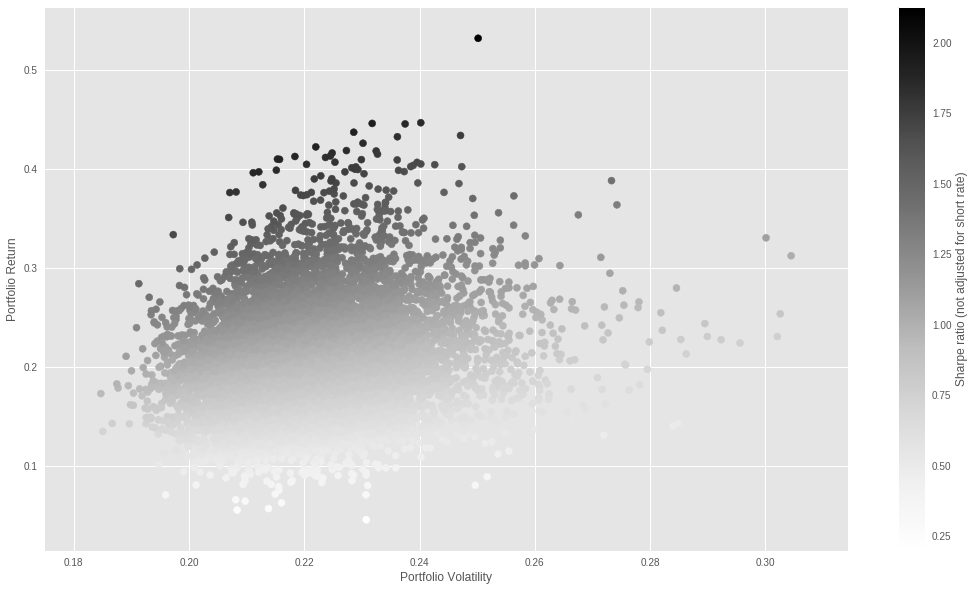

In [151]:
import seaborn as sns
plt.style.use('ggplot')
port_returns, port_vols = portfolio_simulation(10000, table)

In [152]:
returns = np.log(table/table.shift(1))
returns.mean()

11 BIT STUDIOS SPOLKA AKCYJNA                                                      1.227466e-03
X-TRADE BROKERS DOM MAKLERSKI SPOLKA AKCYJNA                                       9.912310e-04
WIRTUALNA POLSKA HOLDING SPOLKA AKCYJNA                                            1.132497e-03
TEN SQUARE GAMES SPOLKA AKCYJNA                                                    2.104493e-03
SELVITA SPOLKA AKCYJNA                                                             2.530176e-03
PLAYWAY SPOLKA AKCYJNA                                                             1.803676e-03
PKP CARGO SPOLKA AKCYJNA                                                          -7.219195e-04
POLENERGIA SPOLKA AKCYJNA                                                          1.114957e-03
ONCOARENDI THERAPEUTICS SPOLKA AKCYJNA                                             3.408328e-04
NEUCA SPOLKA AKCYJNA                                                               7.381085e-04
BANK MILLENNIUM SPOLKA AKCYJNA          

In [153]:
def portfolio_stats(weights):
    
    '''
    We can gather the portfolio performance metrics for a specific set of weights.
    This function will be important because we'll want to pass it to an optmization
    function to get the portfolio with the best desired characteristics.
    
    Note: Sharpe ratio here uses a risk-free short rate of 0.
    
    Paramaters: 
    -----------
        weights: array, 
            asset weights in the portfolio.
        returns: dataframe
            a dataframe of returns for each asset in the trial portfolio    
    
    Returns: 
    --------
        dict of portfolio statistics - mean return, volatility, sharp ratio.
    '''

    # Convert to array in case list was passed instead.
    weights = np.array(weights)
    port_return = np.sum(returns.mean() * weights) * 252
    port_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe = port_return/port_vol

    return {'return': port_return, 'volatility': port_vol, 'sharpe': sharpe}

In [154]:
def minimize_sharpe(weights):  
    return -portfolio_stats(weights)['sharpe'] 

def minimize_volatility(weights):  
    # Note that we don't return the negative of volatility here because we 
    # want the absolute value of volatility to shrink, unlike sharpe.
    return portfolio_stats(weights)['volatility'] 

def minimize_return(weights): 
    return -portfolio_stats(weights)['return']

In [155]:
num_assets = len(table.columns)
constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1})
bounds = tuple((0,1) for x in range(num_assets))
initializer = num_assets * [1./num_assets,]

print (initializer)
print (bounds)

[0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703, 0.02702702702702703]
((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1

In [156]:
optimal_sharpe=minimize(minimize_sharpe,
                                 initializer,
                                 method = 'SLSQP',
                                 bounds = bounds,
                                 constraints = constraints,
                                 )
print(optimal_sharpe)

     fun: -2.9890040963356497
     jac: array([ 1.76719904e-01,  5.43148994e-01,  5.58853149e-04,  1.95145607e-04,
        4.75823879e-04,  7.26878643e-05,  1.80880600e+00,  1.65890157e-02,
        7.98547566e-01,  1.18093789e-02,  7.57735223e-01,  6.75379425e-01,
        8.87624979e-01,  1.61150962e-01,  3.94447684e-01,  5.51814586e-01,
        6.72900200e-01,  4.55357343e-01,  9.41824794e-01,  6.21692121e-01,
        1.04177687e+00,  5.44136763e-03, -1.78641081e-03,  6.21492386e-01,
        9.06117558e-01,  1.55939788e-01,  1.26043367e+00,  6.86610341e-01,
        2.75198132e-01, -6.55651093e-04, -9.14931297e-06,  8.84525627e-01,
        7.84284443e-01,  7.05804050e-01, -1.24722719e-04, -2.78651714e-04,
        3.46988440e-04])
 message: 'Optimization terminated successfully.'
    nfev: 476
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([1.28338551e-16, 6.67456554e-16, 6.97421106e-02, 5.75121415e-02,
       2.00124472e-01, 8.02136489e-03, 7.50338079e-16, 1.90420

In [157]:
optimal_sharpe_weights=optimal_sharpe['x'].round(4)
list(zip(table.columns,list(optimal_sharpe_weights)))

[('11 BIT STUDIOS SPOLKA AKCYJNA', 0.0),
 ('X-TRADE BROKERS DOM MAKLERSKI SPOLKA AKCYJNA', 0.0),
 ('WIRTUALNA POLSKA HOLDING SPOLKA AKCYJNA', 0.0697),
 ('TEN SQUARE GAMES SPOLKA AKCYJNA', 0.0575),
 ('SELVITA SPOLKA AKCYJNA', 0.2001),
 ('PLAYWAY SPOLKA AKCYJNA', 0.008),
 ('PKP CARGO SPOLKA AKCYJNA', 0.0),
 ('POLENERGIA SPOLKA AKCYJNA', 0.0),
 ('ONCOARENDI THERAPEUTICS SPOLKA AKCYJNA', 0.0),
 ('NEUCA SPOLKA AKCYJNA', 0.0),
 ('BANK MILLENNIUM SPOLKA AKCYJNA', 0.0),
 ('MBANK SPOLKA AKCYJNA', 0.0),
 ('MABION SPOLKA AKCYJNA', 0.0),
 ('LIVECHAT SOFTWARE SPOLKA AKCYJNA', 0.0),
 ('GRUPA KĘTY SPOLKA AKCYJNA', 0.0),
 ('KRUK SPOLKA AKCYJNA', 0.0),
 ('KERNEL HOLDING S.A.', 0.0),
 ('ING BANK ŚLĄSKI SPOLKA AKCYJNA', 0.0),
 ('FAMUR SPOLKA AKCYJNA', 0.0),
 ('GIELDA PAPIEROW WARTOŚCIOWYCH W WARSZAWIE SPOLKA AKCYJNA', 0.0),
 ('EUROCASH SPOLKA AKCYJNA', 0.0),
 ('DEVELIA SPOLKA AKCYJNA', 0.0),
 ('BIOMED-LUBLIN WYTWORNIA SUROWIC I SZCZEPIONEK SPOLKA AKCYJNA W RESTRUKTURYZACJI',
  0.0206),
 ('BANK HANDLOWY W

In [158]:
optimal_stats = portfolio_stats(optimal_sharpe_weights)
print(optimal_stats)

print('Optimal Portfolio Return: ', round(optimal_stats['return']*100,4))
print('Optimal Portfolio Volatility: ', round(optimal_stats['volatility']*100,4))
print('Optimal Portfolio Sharpe Ratio: ', round(optimal_stats['sharpe'],4))

{'return': 1.091343925280705, 'volatility': 0.3651195759826996, 'sharpe': 2.98900414293978}
Optimal Portfolio Return:  109.1344
Optimal Portfolio Volatility:  36.512
Optimal Portfolio Sharpe Ratio:  2.989


In [159]:
constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1}, {'type' : 'ineq', 'fun': lambda x: -np.sum(x**2) +0.25})
optimal_variance=minimize(minimize_volatility,
                                   initializer,
                                   method = 'SLSQP',
                                   bounds = bounds,
                                   constraints = constraints
                                   )

print(optimal_variance)
optimal_variance_weights=optimal_variance['x'].round(4)
list(zip(table.columns,list(optimal_variance_weights)))

     fun: 0.15667305964297976
     jac: array([0.15668445, 0.15675852, 0.15660626, 0.19437977, 0.24676346,
       0.16737708, 0.17641776, 0.15665326, 0.20460816, 0.15666408,
       0.23191498, 0.20058485, 0.19190801, 0.1566222 , 0.15698173,
       0.18714892, 0.15673846, 0.15661393, 0.1565744 , 0.15674273,
       0.15669904, 0.18269407, 0.15687804, 0.15674654, 0.1566196 ,
       0.21650416, 0.1876731 , 0.16621537, 0.15658135, 0.1892745 ,
       0.15673161, 0.21651921, 0.18770875, 0.18822044, 0.15667105,
       0.18533387, 0.15657835])
 message: 'Optimization terminated successfully.'
    nfev: 390
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([3.45773794e-02, 2.45792017e-02, 8.96533761e-02, 0.00000000e+00,
       0.00000000e+00, 3.09124674e-17, 2.38863291e-18, 2.73244137e-02,
       9.54733186e-18, 1.75533815e-01, 6.70939033e-17, 1.87965081e-17,
       2.39286808e-19, 3.15484956e-02, 7.09417405e-03, 0.00000000e+00,
       7.40689646e-02, 7.75401974e-02, 1.4078322

[('11 BIT STUDIOS SPOLKA AKCYJNA', 0.0346),
 ('X-TRADE BROKERS DOM MAKLERSKI SPOLKA AKCYJNA', 0.0246),
 ('WIRTUALNA POLSKA HOLDING SPOLKA AKCYJNA', 0.0897),
 ('TEN SQUARE GAMES SPOLKA AKCYJNA', 0.0),
 ('SELVITA SPOLKA AKCYJNA', 0.0),
 ('PLAYWAY SPOLKA AKCYJNA', 0.0),
 ('PKP CARGO SPOLKA AKCYJNA', 0.0),
 ('POLENERGIA SPOLKA AKCYJNA', 0.0273),
 ('ONCOARENDI THERAPEUTICS SPOLKA AKCYJNA', 0.0),
 ('NEUCA SPOLKA AKCYJNA', 0.1755),
 ('BANK MILLENNIUM SPOLKA AKCYJNA', 0.0),
 ('MBANK SPOLKA AKCYJNA', 0.0),
 ('MABION SPOLKA AKCYJNA', 0.0),
 ('LIVECHAT SOFTWARE SPOLKA AKCYJNA', 0.0315),
 ('GRUPA KĘTY SPOLKA AKCYJNA', 0.0071),
 ('KRUK SPOLKA AKCYJNA', 0.0),
 ('KERNEL HOLDING S.A.', 0.0741),
 ('ING BANK ŚLĄSKI SPOLKA AKCYJNA', 0.0775),
 ('FAMUR SPOLKA AKCYJNA', 0.0141),
 ('GIELDA PAPIEROW WARTOŚCIOWYCH W WARSZAWIE SPOLKA AKCYJNA', 0.1439),
 ('EUROCASH SPOLKA AKCYJNA', 0.0247),
 ('DEVELIA SPOLKA AKCYJNA', 0.0),
 ('BIOMED-LUBLIN WYTWORNIA SUROWIC I SZCZEPIONEK SPOLKA AKCYJNA W RESTRUKTURYZACJI',
  0.

In [160]:
target_returns = np.linspace(port_returns.min(),port_returns.max(),50)

# Initialize optimization parameters
minimal_volatilities = []
bounds = tuple((0,1) for x in weights)
initializer = num_assets * [1./num_assets,]

for target_return in target_returns:
    
    constraints = ({'type':'eq','fun': lambda x: portfolio_stats(x)['return']-target_return},
                   {'type':'eq','fun': lambda x: np.sum(x)-1})
       
    optimal = minimize(minimize_volatility,
                              initializer,
                              method = 'SLSQP',
                              bounds = bounds,
                              constraints = constraints)
    
    minimal_volatilities.append(optimal['fun'])

minimal_volatilities = np.array(minimal_volatilities)

KeyboardInterrupt: 

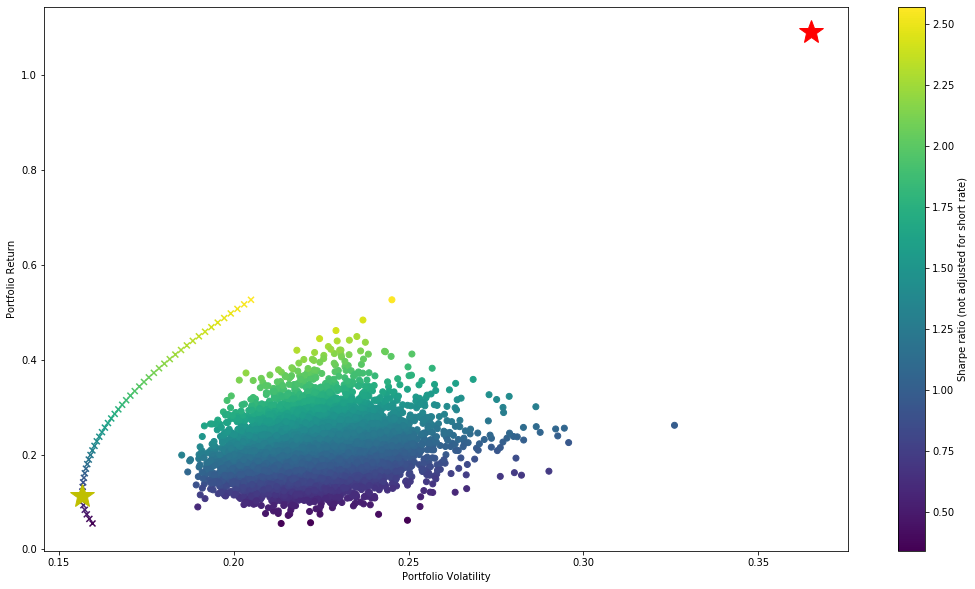

In [ ]:
import matplotlib.pyplot as plt 

# initialize figure size
plt.figure(figsize=(18,10))

plt.scatter(port_vols,
            port_returns,
            c = (port_returns / port_vols),
            marker = 'o')

plt.scatter(minimal_volatilities,
            target_returns,
            c = (target_returns / minimal_volatilities),
            marker = 'x')

plt.plot(portfolio_stats(optimal_sharpe_weights)['volatility'],
         portfolio_stats(optimal_sharpe_weights)['return'],
         'r*',
         markersize = 25.0)

plt.plot(portfolio_stats(optimal_variance_weights)['volatility'],
         portfolio_stats(optimal_variance_weights)['return'],
         'y*',
         markersize = 25.0)

plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe ratio (not adjusted for short rate)')